In [83]:
%matplotlib inline
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
steam_df = pd.read_csv("steam.csv")
warnings.filterwarnings(action='ignore')

In [2]:
steam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27075 entries, 0 to 27074
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   appid             27075 non-null  int64  
 1   name              27075 non-null  object 
 2   release_date      27075 non-null  object 
 3   english           27075 non-null  int64  
 4   developer         27075 non-null  object 
 5   publisher         27075 non-null  object 
 6   platforms         27075 non-null  object 
 7   required_age      27075 non-null  int64  
 8   categories        27075 non-null  object 
 9   genres            27075 non-null  object 
 10  steamspy_tags     27075 non-null  object 
 11  achievements      27075 non-null  int64  
 12  positive_ratings  27075 non-null  int64  
 13  negative_ratings  27075 non-null  int64  
 14  average_playtime  27075 non-null  int64  
 15  median_playtime   27075 non-null  int64  
 16  owners            27075 non-null  object

In [3]:
# 긍정적 평가와 부정적 평가의 상관계수, 1에 가까울수록 상관관계 높음
corr = steam_df[['positive_ratings','negative_ratings']].corr(method='pearson')
print(corr)

                  positive_ratings  negative_ratings
positive_ratings          1.000000          0.762804
negative_ratings          0.762804          1.000000


In [4]:
cols = ['achievements', 'positive_ratings', 'negative_ratings', 'average_playtime','median_playtime','price']
corr = steam_df[cols].corr(method='pearson')
print(corr)

                  achievements  positive_ratings  negative_ratings  \
achievements          1.000000          0.006058          0.003578   
positive_ratings      0.006058          1.000000          0.762804   
negative_ratings      0.003578          0.762804          1.000000   
average_playtime      0.014175          0.157898          0.161140   
median_playtime       0.009957          0.035776          0.047887   
price                -0.007996          0.036110          0.051259   

                  average_playtime  median_playtime     price  
achievements              0.014175         0.009957 -0.007996  
positive_ratings          0.157898         0.035776  0.036110  
negative_ratings          0.161140         0.047887  0.051259  
average_playtime          1.000000         0.914900  0.049242  
median_playtime           0.914900         1.000000  0.036610  
price                     0.049242         0.036610  1.000000  


## 1. 긍정적인 평가 Top 100 내림차순 그래프

In [37]:
rating = steam_df[['name','positive_ratings','negative_ratings']]
steam_df['positive'] = rating['positive_ratings']/(rating['positive_ratings']+rating['negative_ratings'])
mean=  (steam_df['negative_ratings'].sum()+steam_df['negative_ratings'].sum())/27075
filt = (steam_df['negative_ratings']+steam_df['negative_ratings'] >= mean)

sorted1 = steam_df[filt].sort_values('positive',ascending=False)

sorted1.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,positive
23,620,Portal 2,2011-04-18,1,Valve,Valve,windows;mac;linux,0,Single-player;Co-op;Steam Achievements;Full co...,Action;Adventure,Puzzle;Co-op;First-Person,51,138220,1891,1102,520,10000000-20000000,7.19,0.986504
7577,427520,Factorio,2016-02-25,1,Wube Software LTD.,Wube Software LTD.,windows;mac;linux,0,Single-player;Multi-player;Online Multi-Player...,Casual;Indie;Simulation;Strategy;Early Access,Early Access;Base-Building;Resource Management,38,47918,723,10087,6880,1000000-2000000,21.00,0.985136
2290,264200,One Finger Death Punch,2014-03-03,1,Silver Dollar Games,Silver Dollar Games,windows,0,Single-player;Steam Achievements;Partial Contr...,Action;Casual;Indie,Action;Fast-Paced;Indie,152,14181,256,149,107,500000-1000000,3.99,0.982268
7509,424280,Iron Snout,2016-01-27,1,SnoutUp,SnoutUp,windows;mac;linux,0,Single-player;Steam Achievements;Partial Contr...,Action;Free to Play;Indie,Free to Play;Action;Fighting,37,13889,277,10647,76,1000000-2000000,0.00,0.980446
7399,420530,OneShot,2016-12-08,1,Little Cat Feet,Degica,windows;mac;linux,0,Single-player;Steam Achievements;Steam Trading...,Adventure;Casual;Indie,Story Rich;Pixel Graphics;Great Soundtrack,11,10985,220,327,469,200000-500000,6.99,0.980366


In [38]:
x1 = sorted1['name'].head(100).reset_index(drop=True)
y1 = sorted1['positive'].head(100).reset_index(drop=True)

(90.0, 100.0)

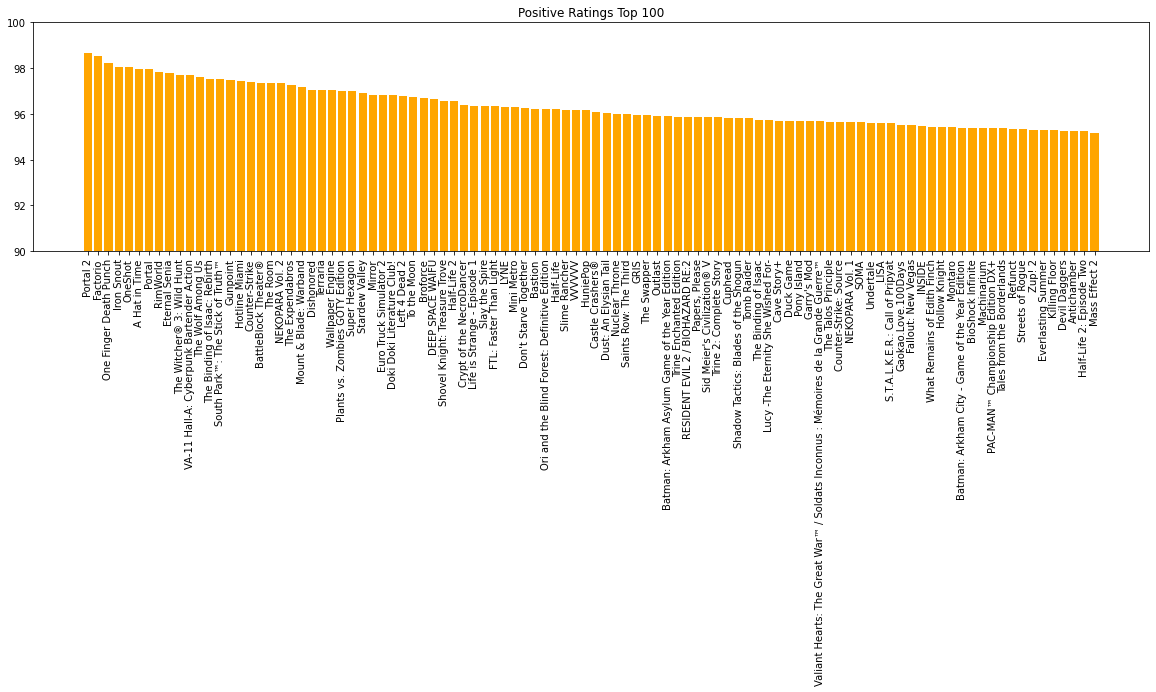

In [87]:
fig1, ax1 = plt.subplots(figsize=(20, 6))
ax1.bar(x1,y1*100, color = 'orange')
ax1.set_title('Positive Ratings Top 100')
plt.xticks(rotation=90)
plt.subplots_adjust(bottom=0.35)
plt.ylim([90, 100])

## 2. 부정적인 평가 Top 100 내림차순 그래프

In [40]:
steam_df['negative'] = rating['negative_ratings']/(rating['positive_ratings']+rating['negative_ratings'])

sorted2 = steam_df[filt].sort_values('negative',ascending=False)

x2 = sorted2['name'].head(100).reset_index(drop=True)
y2 = sorted2['negative'].head(100).reset_index(drop=True)

sorted2.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,positive,negative
1998,252050,Construction Machines 2014,2014-03-28,1,GameCask,GameCask,windows,0,Single-player,Simulation,Simulation;Building;Singleplayer,0,38,272,108,108,20000-50000,4.99,0.122581,0.877419
1197,201510,Flatout 3: Chaos & Destruction,2011-12-13,1,Team 6 Studios,Strategy First,windows,0,Single-player;Multi-player;Co-op;Partial Contr...,Racing,Racing;Psychological Horror;Destruction,46,290,1874,19,19,200000-500000,6.99,0.134011,0.865989
1196,201490,Airline Tycoon 2,2011-10-24,1,b-Alive,Kalypso Media Digital,windows,0,Single-player,Simulation;Strategy,Simulation;Strategy;Economy,0,61,386,0,0,50000-100000,6.99,0.136465,0.863535
2513,273770,Game Tycoon 1.5,2014-02-11,1,Sunlight Games,Sunlight Games,windows,0,Single-player;Steam Cloud,Simulation;Strategy,Simulation;Strategy;Management,0,89,547,240,248,100000-200000,0.79,0.139937,0.860063
1768,238870,Citadels,2013-07-25,1,Games Distillery s.r.o.,HandyGames,windows,0,Single-player;Steam Achievements;Steam Trading...,Action;Strategy,Strategy;Action;Medieval,26,62,354,0,0,50000-100000,10.99,0.149038,0.850962


(60.0, 100.0)

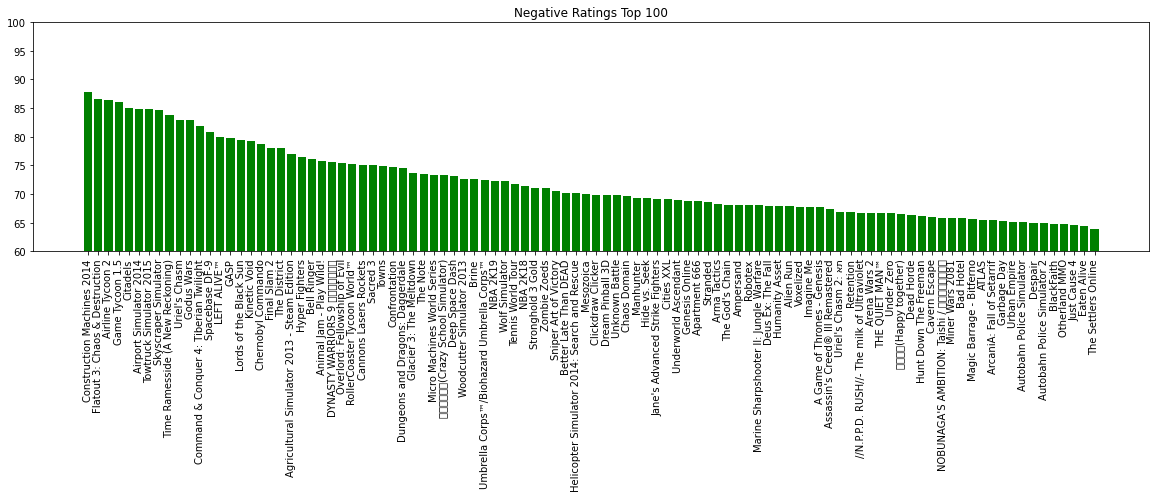

In [91]:
fig2, ax2 = plt.subplots(figsize=(20, 6))
ax2.bar(x2,y2*100, color = 'green', label = '')
ax2.set_title('Negative Ratings Top 100')
plt.xticks(rotation=90)
plt.subplots_adjust(bottom=0.35)
plt.ylim([60, 100])

## 3. 오래 즐길 수 있는 게임 Top 100 (긍정적 평가 100개 중, 플레이 타임 중간값 내림차순)

In [70]:
sorted3 = sorted1.head(100).sort_values('median_playtime',ascending=False)

x3 = sorted3['name'].head(100).reset_index(drop=True)
y3 = sorted3['median_playtime'].head(100).reset_index(drop=True)

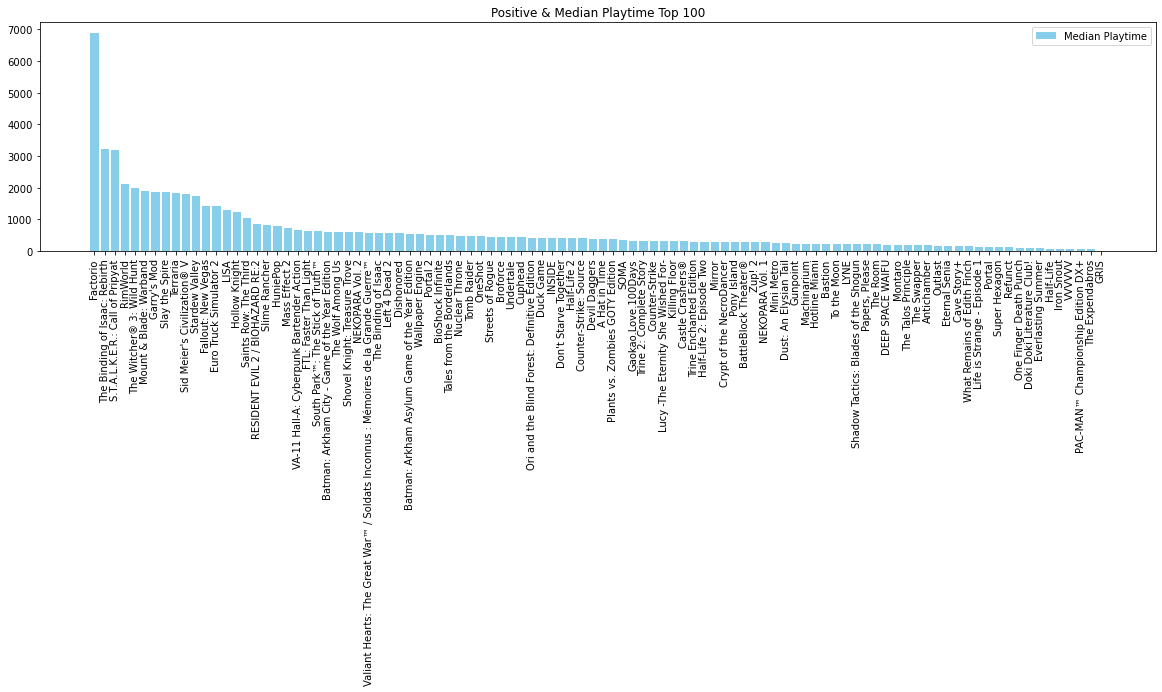

In [80]:
fig3, ax3 = plt.subplots(figsize=(20, 6))
ax3.set_title('Positive & Median Playtime Top 100')
plt.xticks(rotation=90)
plt.subplots_adjust(bottom=0.35)

ax3.bar(x3, y3, label = 'Median Playtime', color= 'skyblue') # cyan 색, square 마커
plt.legend() # 범례 표시
plt.show()

## 4-1. 가성비 게임 Top 100 (긍정적 평가, 플레이 타임 내림차순 + 가격 오름차순)

In [74]:
sorted4 = sorted3.head(100).sort_values('price')
x4 = sorted4['name'].head(100).reset_index(drop=True)
y4 = sorted4['price'].head(100).reset_index(drop=True)

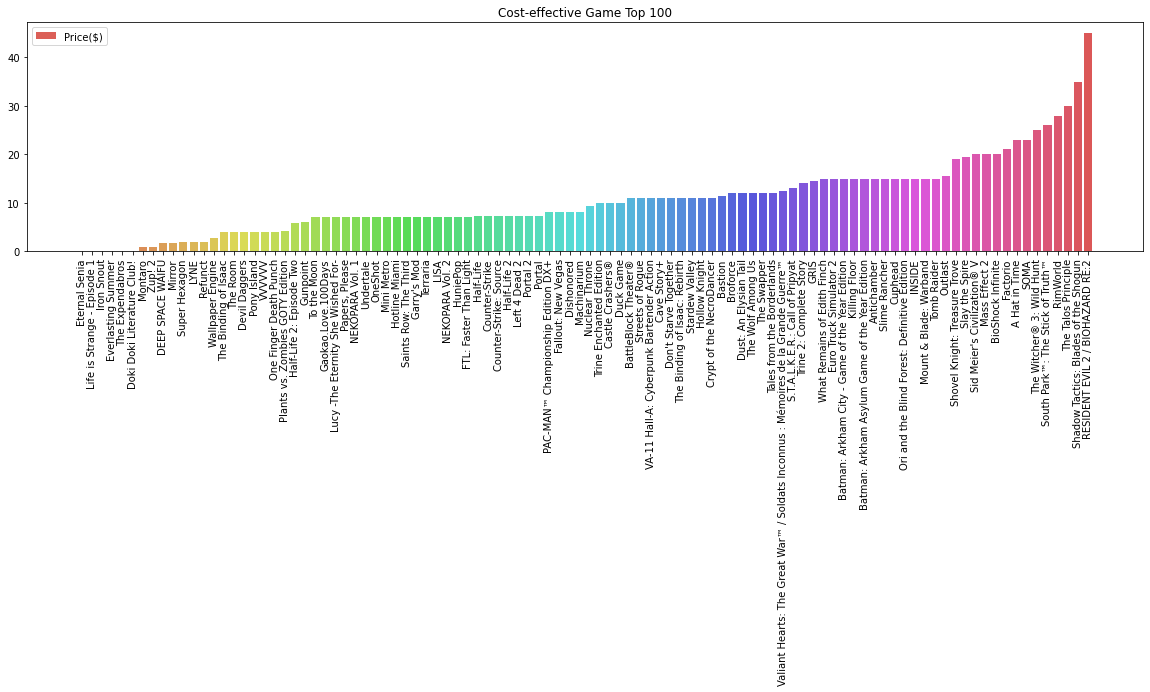

In [92]:
fig4, ax4 = plt.subplots(figsize=(20, 6))
ax4.set_title('Cost-effective Game Top 100')
plt.xticks(rotation=90)
plt.subplots_adjust(bottom=0.35)

colors = sns.color_palette('hls',len(x4))
ax4.bar(x4, y4, label = 'Price($)', color=colors)
plt.legend()
plt.show()